# Assignment 3 KNN Iris Dataset
### Name: Tanmay Walke
### Date: 10 Feb 2025
### Class: TY-CSE(AI)
### Roll No.: 65

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [7]:
df = pd.read_csv('iris.csv')

## Data Analysis

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## KNN

In [13]:
df = df.drop(columns=['Id'])

In [14]:
X = df.drop(columns=['Species'])
y = df['Species']

In [15]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardizing the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Initializing the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [18]:
# Fitting the model to the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [19]:
# Making predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [20]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Confusion Matrix :-
# First row (for Iris-setosa):

# 10: The number of times the model correctly predicted Iris-setosa.
# 0: The number of times the model incorrectly predicted Iris-versicolor when the true species was Iris-setosa.
# 0: The number of times the model incorrectly predicted Iris-virginica when the true species was Iris-setosa.
# Second row (for Iris-versicolor):

# 0: The number of times the model incorrectly predicted Iris-setosa when the true species was Iris-versicolor.
# 9: The number of times the model correctly predicted Iris-versicolor.
# 0: The number of times the model incorrectly predicted Iris-virginica when the true species was Iris-versicolor.
# Third row (for Iris-virginica):

# 0: The number of times the model incorrectly predicted Iris-setosa when the true species was Iris-virginica.
# 0: The number of times the model incorrectly predicted Iris-versicolor when the true species was Iris-virginica.
# 11: The number of times the model correctly predicted Iris-virginica.

In [21]:
# Displaying the results
accuracy_percentage = accuracy * 100

# Displaying accuracy as a percentage
print(f"Accuracy: {accuracy_percentage:.2f}%")

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Without Libraries

### Euclidean Distance

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.utils import shuffle  

# Load the dataset
df = pd.read_csv('iris.csv')

# Randomize (shuffle) the dataset
df = shuffle(df, random_state=42)  # Using random_state for reproducibility

# Drop the 'Id' column as it's not needed for classification
df = df.drop(columns=['Id'])

# Split the dataset into features and target
X = df.drop(columns=['Species']).values
y = df['Species'].values

# Function to compute the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to perform KNN classification
def knn(X_train, y_train, X_test, k=3):
    predictions = []
    
    # Loop over each test point
    for test_point in X_test:
        # Calculate distances to all training points
        distances = []
        for train_point, label in zip(X_train, y_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, label))
        
        # Sort distances and get the labels of the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]
        
        # Get the most common label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    
    return predictions

# Split the dataset into training and testing sets (80% train, 20% test)
train_size = int(0.8*len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Perform KNN classification
k = 5
predictions = knn(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Initialize lists for correct and incorrect classifications
correctly_classified = []
incorrectly_classified = []

# Compare predictions to actual labels
for true_label, predicted_label, features in zip(y_test, predictions, X_test):
    if true_label == predicted_label:
        correctly_classified.append((features, true_label, predicted_label))
    else:
        incorrectly_classified.append((features, true_label, predicted_label))

# Print the correctly classified labels
print("\nCorrectly classified labels:")
for features, true_label, predicted_label in correctly_classified:
    print(f"Features: {features}, True Label: {true_label}, Predicted Label: {predicted_label}")

# Print the incorrectly classified labels
print("\nIncorrectly classified labels:")
for features, true_label, predicted_label in incorrectly_classified:
    print(f"Features: {features}, True Label: {true_label}, Predicted Label: {predicted_label}")


Accuracy: 96.67%

Correctly classified labels:
Features: [6.1 3.  4.6 1.4], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [4.5 2.3 1.3 0.3], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [6.6 2.9 4.6 1.3], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [5.5 2.6 4.4 1.2], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [5.3 3.7 1.5 0.2], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [5.6 3.  4.1 1.3], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [7.3 2.9 6.3 1.8], True Label: Iris-virginica, Predicted Label: Iris-virginica
Features: [6.7 3.3 5.7 2.1], True Label: Iris-virginica, Predicted Label: Iris-virginica
Features: [5.1 3.7 1.5 0.4], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [4.9 2.4 3.3 1. ], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [6.7 3.3 5.7 2.5], True Label: Iris-virginica, Predicted Labe

### Manhattan distance

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.utils import shuffle  # Importing shuffle from sklearn

# Load the dataset
df = pd.read_csv('iris.csv')

# Randomize (shuffle) the dataset
df = shuffle(df, random_state=42)

# Drop the 'Id' column as it's not needed for classification
df = df.drop(columns=['Id'])

# Split the dataset into features and target
X = df.drop(columns=['Species']).values
y = df['Species'].values

# Function to compute the Manhattan distance between two points
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

# Function to perform KNN classification
def knn(X_train, y_train, X_test, k=3):
    predictions = []
    
    # Loop over each test point
    for test_point in X_test:
        # Calculate distances to all training points
        distances = []
        for train_point, label in zip(X_train, y_train):
            dist = manhattan_distance(test_point, train_point)
            distances.append((dist, label))
        
        # Sort distances and get the labels of the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]
        
        # Get the most common label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    
    return predictions

# Split the dataset into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Perform KNN classification
k = 5
predictions = knn(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')




# Initialize lists for correct and incorrect classifications
correctly_classified = []
incorrectly_classified = []

# Compare predictions to actual labels
for true_label, predicted_label, features in zip(y_test, predictions, X_test):
    if true_label == predicted_label:
        correctly_classified.append((features, true_label, predicted_label))
    else:
        incorrectly_classified.append((features, true_label, predicted_label))

# Print the correctly classified labels
print("\nCorrectly classified labels:")
for features, true_label, predicted_label in correctly_classified:
    print(f"Features: {features}, True Label: {true_label}, Predicted Label: {predicted_label}")

# Print the incorrectly classified labels
print("\nIncorrectly classified labels:")
for features, true_label, predicted_label in incorrectly_classified:
    print(f"Features: {features}, True Label: {true_label}, Predicted Label: {predicted_label}")



Accuracy: 96.67%

Correctly classified labels:
Features: [6.1 3.  4.6 1.4], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [4.5 2.3 1.3 0.3], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [6.6 2.9 4.6 1.3], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [5.5 2.6 4.4 1.2], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [5.3 3.7 1.5 0.2], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [5.6 3.  4.1 1.3], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [7.3 2.9 6.3 1.8], True Label: Iris-virginica, Predicted Label: Iris-virginica
Features: [6.7 3.3 5.7 2.1], True Label: Iris-virginica, Predicted Label: Iris-virginica
Features: [5.1 3.7 1.5 0.4], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [4.9 2.4 3.3 1. ], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [6.7 3.3 5.7 2.5], True Label: Iris-virginica, Predicted Labe

# Visualization

### Histogram

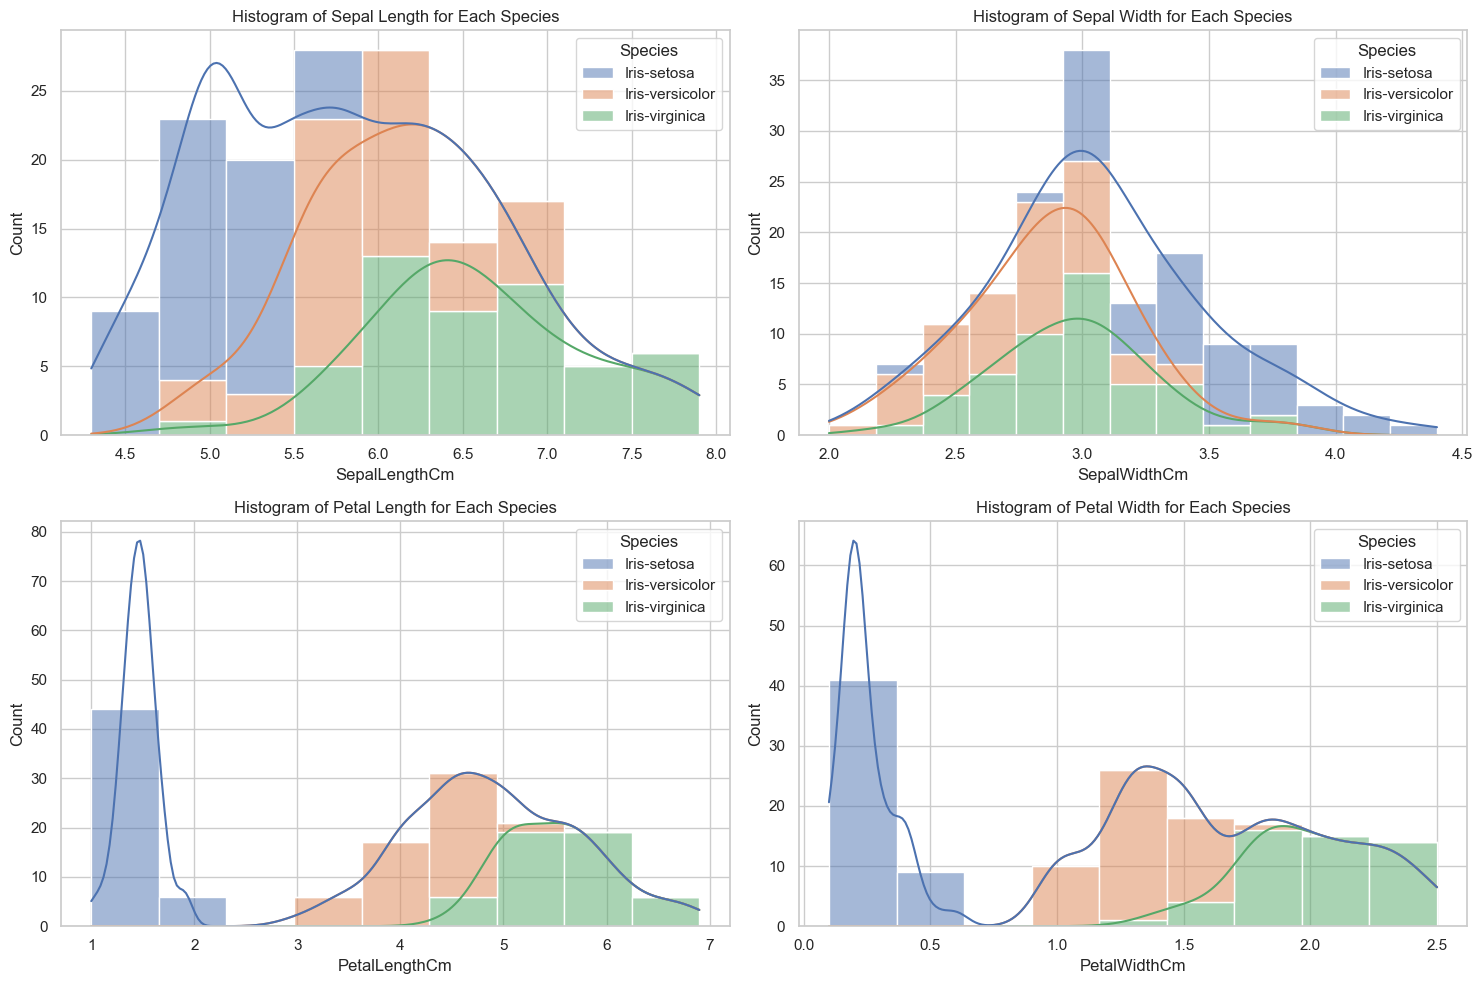

In [22]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Histogram of features for each species
plt.figure(figsize=(15, 10))

# Histograms for Sepal Length for each species
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='SepalLengthCm', hue='Species', kde=True, multiple="stack")
plt.title('Histogram of Sepal Length for Each Species')

# Histograms for Sepal Width for each species
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='SepalWidthCm', hue='Species', kde=True, multiple="stack")
plt.title('Histogram of Sepal Width for Each Species')

# Histograms for Petal Length for each species
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='PetalLengthCm', hue='Species', kde=True, multiple="stack")
plt.title('Histogram of Petal Length for Each Species')

# Histograms for Petal Width for each species
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='PetalWidthCm', hue='Species', kde=True, multiple="stack")
plt.title('Histogram of Petal Width for Each Species')

plt.tight_layout()
plt.show()


### Boxplot

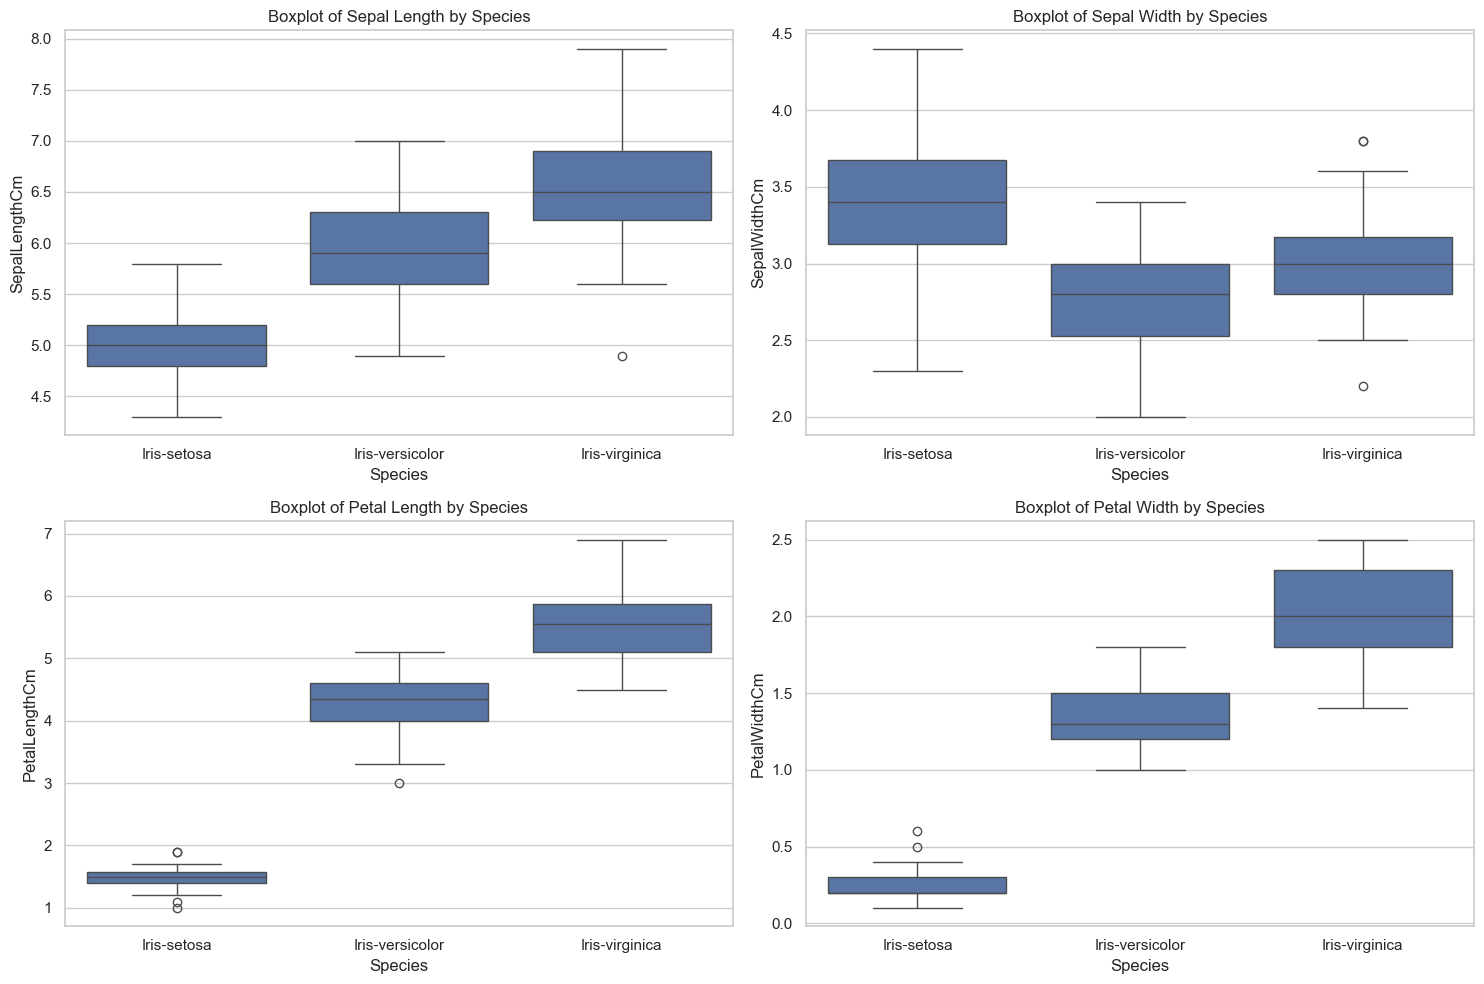

In [23]:
# 2. Boxplot for each feature to compare distributions by species
plt.figure(figsize=(15, 10))

# Boxplot for Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Boxplot of Sepal Length by Species')

# Boxplot for Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Boxplot of Sepal Width by Species')

# Boxplot for Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Boxplot of Petal Length by Species')

# Boxplot for Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Boxplot of Petal Width by Species')

plt.tight_layout()
plt.show()

### Pairplot

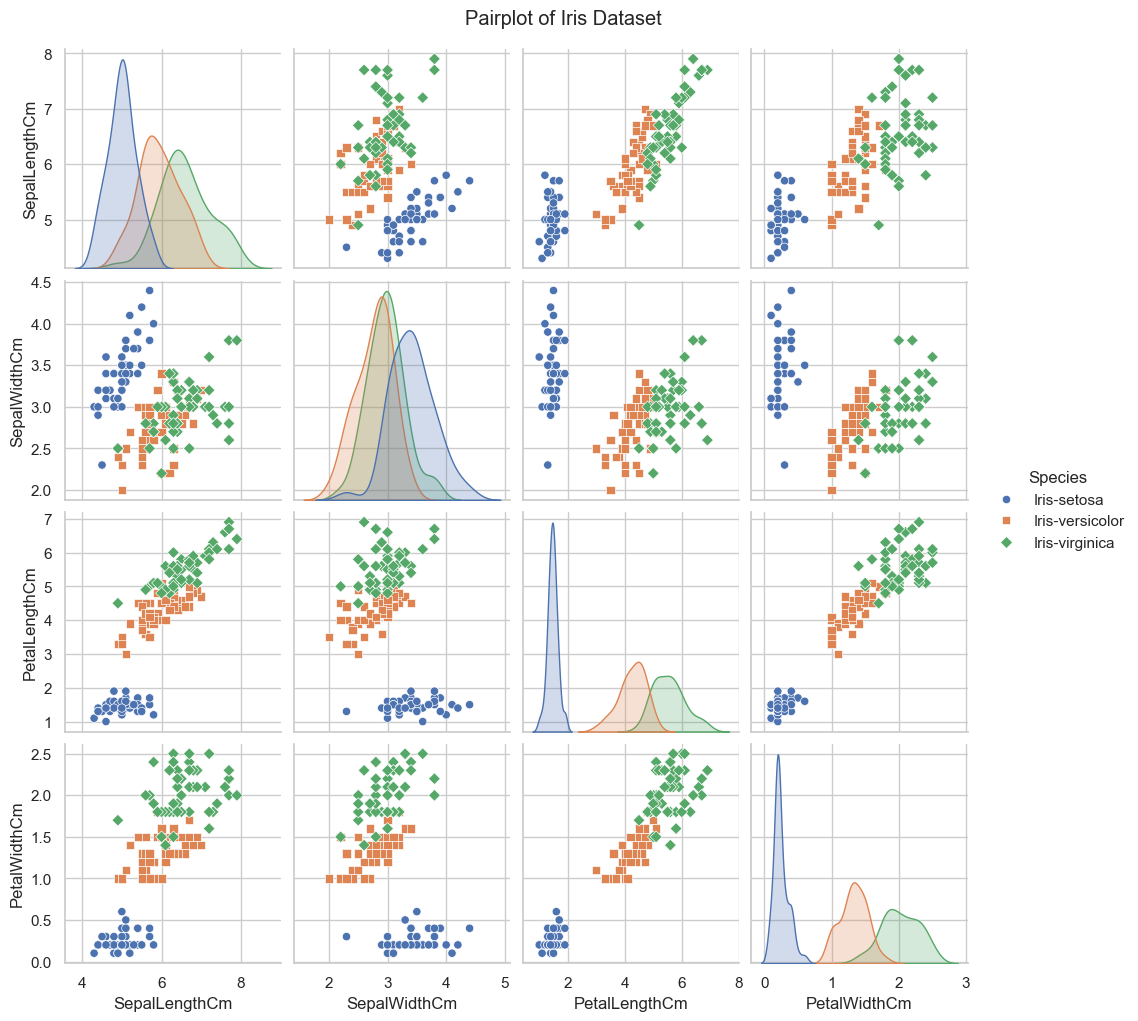

In [24]:
# 3. Pairplot to see relationships between features and species
sns.pairplot(df, hue="Species", markers=["o", "s", "D"], height=2.5)
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()
